In [125]:
import cmath
import math
import numpy as numpy
import matplotlib.pyplot as plt
from cmath import exp as e
from math import pi as pi

def fft(array_number):
    n = len(array_number)

    if n > 1:
        array_number = fft(array_number[::2]) + fft(array_number[1::2])
        
        temp = e(-2 * pi * complex(0, 1) / n)

        for i in range(n // 2):
            old_number_i = array_number[i]
            array_number[i] += temp ** i * array_number[i + n // 2]
            array_number[i + n // 2] = old_number_i - temp ** i * array_number[i + n // 2]

    return array_number


def fft_reverse(signal):
    timeSignal = []
    for x in signal:
        timeSignal.append(x.conjugate())
    timeSignal = fft(timeSignal)
    
    res = []
    for x in timeSignal:
        res.append(x.conjugate() / len(signal))
    return res


def calc_fft(func):
    array_number = []
    for i in range(0, 1004):
        array_number.append(func(i * 0.01))
    for i in range(0, 20):
        array_number.append(0)
    return fft(array_number)


def calc_fft1(func):
    array_number = []
    for i in range(0, 994):
        array_number.append(func(i * 0.01))
    for i in range(0, 30):
        array_number.append(0)
    return fft(array_number)


def make_reverse(array_number, D = 0):
    i = 0
    while i < 1024*D:
        array_number[-24 - i] = 0
        i += 1
    reversed_array_number = fft_reverse(array_number)
    real_numbers = []
    eps = 0.1 ** 7
    for num in reversed_array_number:
        if abs(num) > eps:
            real_numbers.append(num.real)
        else:
            real_numbers.append(0)
    return real_numbers


def draw_graphics(array_number):
    axis_x = []
    for i in range(0, 1000):
        axis_x.append(i * 0.1)
    
    plt.plot(axis_x, array_number[:1000], 'b--')
    plt.show()



def draw_graphics1(array_number):
    axis_x = []
    for i in range(0, 800):
        axis_x.append(i * 0.1)
    
    plt.plot(axis_x, array_number[:800], 'b--')
    plt.show()

def equal_x(x):
    return (x * sinus(x)) ** 3 - x ** 2 


def sinus(x):
    return math.sin(x)


def square(x):
    return x * x


def sinus_square(x):
    return sinus(square(x))


def sin_per_x(x):
    if x == 0:
        return 1
    else:
        return sinus(x)/x

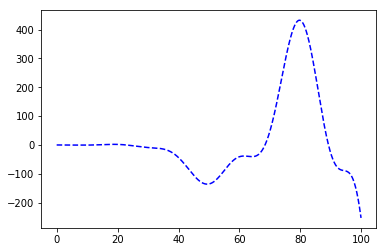

In [126]:
fft_array = numpy.array(calc_fft(equal_x))
values = []

for i in range(0, 1000):
    values.append(equal_x(i * 0.01))
for i in range(0, 24):
    values.append(0)

reversed_fft = make_reverse(fft_array, 0)
draw_graphics(reversed_fft)

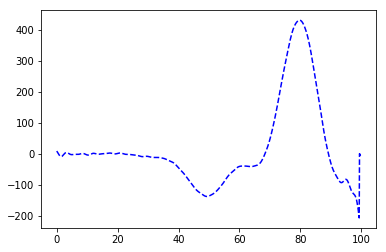

In [127]:
fft_array = numpy.array(calc_fft1(equal_x))
values = []
for i in range(0, 1000):
    values.append(equal_x(i * 0.01))
for i in range(0, 24):
    values.append(0)

eps = 0.01
reversed_fft = make_reverse(fft_array, eps)
draw_graphics(reversed_fft)

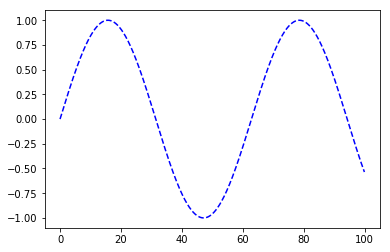

In [128]:
fft_array = numpy.array(calc_fft(sinus))
values = []
for i in range(0, 1003):
    values.append(sinus(i * 0.01))
for i in range(0, 25):
    values.append(0)

reversed_fft = make_reverse(fft_array, 0)
draw_graphics(reversed_fft)

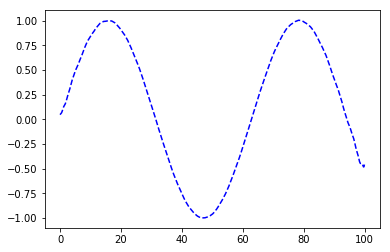

In [129]:
fft_array = numpy.array(calc_fft(sinus))
values = []
for i in range(0, 1000):
    values.append(sinus(i * 0.01))
for i in range(0, 24):
    values.append(0)
    
eps = 0.9
reversed_fft = make_reverse(fft_array, eps)
draw_graphics(reversed_fft)

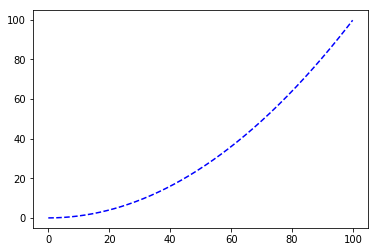

In [130]:
fft_array = numpy.array(calc_fft(square))
values = []
for i in range(0, 1001):
    values.append(square(i * 0.01))
for i in range(0, 23):
    values.append(0)

reversed_fft = make_reverse(fft_array, 0)
draw_graphics(reversed_fft)

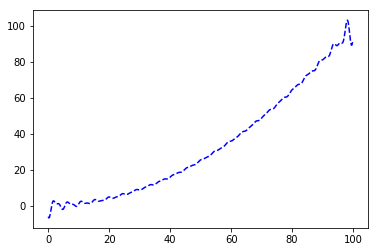

In [131]:
fft_array = numpy.array(calc_fft(square))
values = []
for i in range(0, 1001):
    values.append(square(i * 0.01))
for i in range(0, 23):
    values.append(0)

eps = 0.02
reversed_fft = make_reverse(fft_array, eps)
draw_graphics(reversed_fft)

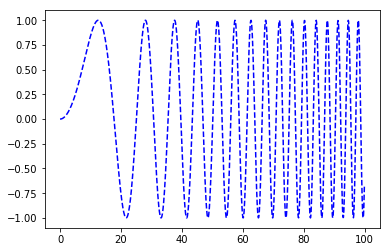

In [132]:
fft_array = numpy.array(calc_fft(sinus_square))
values = []
for i in range(0, 1001):
    values.append(sinus_square(i * 0.01))
for i in range(0, 23):
    values.append(0)

reversed_fft = make_reverse(fft_array, 0)
draw_graphics(reversed_fft)

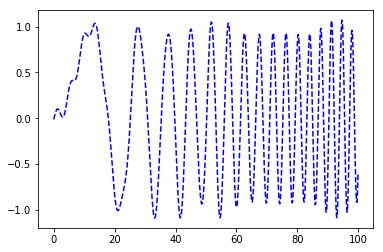

In [133]:
fft_array = numpy.array(calc_fft(sinus_square))
values = []
for i in range(0, 1000):
    values.append(sinus_square(i * 0.01))
for i in range(0, 24):
    values.append(0)
    
eps = 0.000000000001
reversed_fft = make_reverse(fft_array, eps)
draw_graphics(reversed_fft)

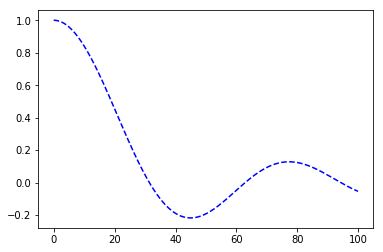

In [134]:
fft_array = numpy.array(calc_fft(sin_per_x))
values = []
for i in range(0, 1001):
    values.append(sin_per_x(i * 0.01))
for i in range(0, 23):
    values.append(0)

reversed_fft = make_reverse(fft_array, 0)
draw_graphics(reversed_fft)

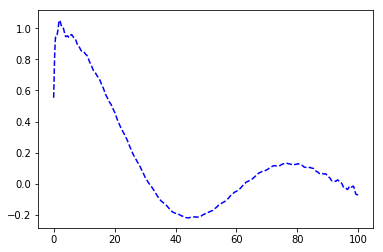

In [135]:
fft_array = numpy.array(calc_fft(sin_per_x))
values = []
for i in range(0, 500):
    values.append(sin_per_x(i / 50))
for i in range(0, 524):
    values.append(0)

eps = 0.9
reversed_fft = make_reverse(fft_array, eps)
draw_graphics(reversed_fft)